In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
import numpy as np
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from PIL import Image
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('../input/titanic/train.csv')
df1 = pd.read_csv('../input/titanic/test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
for i in df.select_dtypes(exclude='object').columns:
    print('_________________________________________________________')
    print(i)
    print(df.groupby(['Survived'])[i].describe())

_________________________________________________________
PassengerId
          count        mean         std  min     25%    50%    75%    max
Survived                                                                 
0         549.0  447.016393  260.640469  1.0  211.00  455.0  675.0  891.0
1         342.0  444.368421  252.358840  2.0  250.75  439.5  651.5  890.0
_________________________________________________________
Survived
          count  mean  std  min  25%  50%  75%  max
Survived                                           
0         549.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
1         342.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
_________________________________________________________
Pclass
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
__________________________________________________

In [10]:
c = ['Survived', 'Pclass','Sex','SibSp',
       'Parch','Cabin', 'Embarked']

In [11]:
for i in c:
    print('_______________________________________')
    print('---------------------------------------')
    print(i)
    print('---------------------------------------')
    print(df[i].unique())

_______________________________________
---------------------------------------
Survived
---------------------------------------
[0 1]
_______________________________________
---------------------------------------
Pclass
---------------------------------------
[3 1 2]
_______________________________________
---------------------------------------
Sex
---------------------------------------
['male' 'female']
_______________________________________
---------------------------------------
SibSp
---------------------------------------
[1 0 3 4 2 5 8]
_______________________________________
---------------------------------------
Parch
---------------------------------------
[0 1 2 5 3 4 6]
_______________________________________
---------------------------------------
Cabin
---------------------------------------
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 

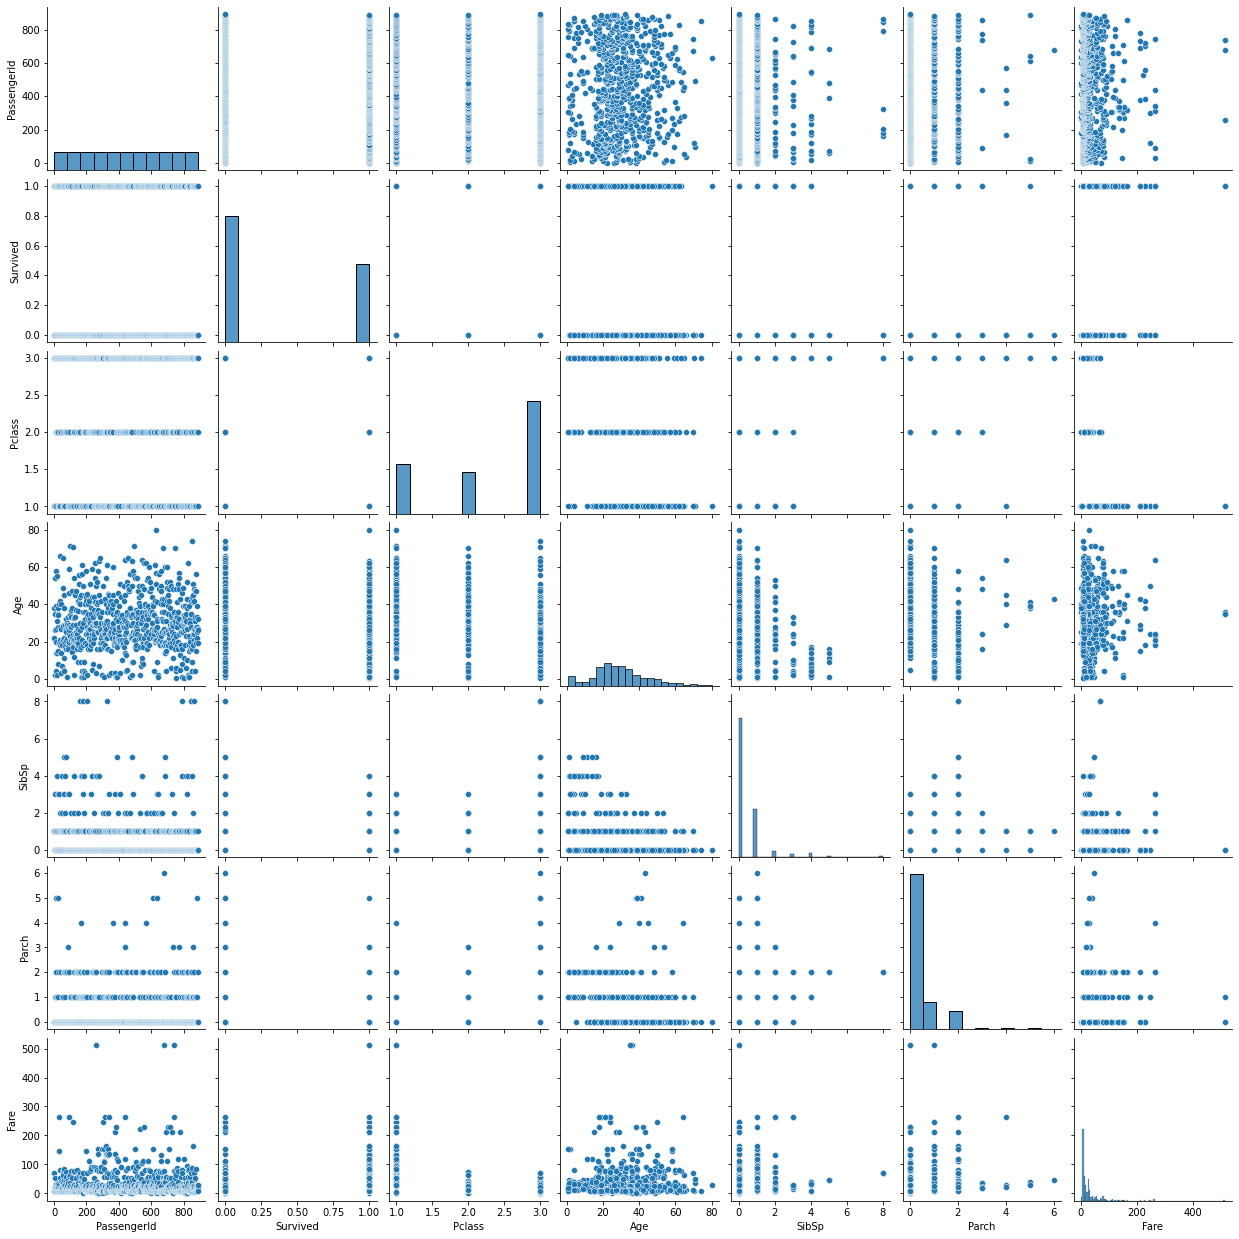

In [12]:
sns.pairplot(df)

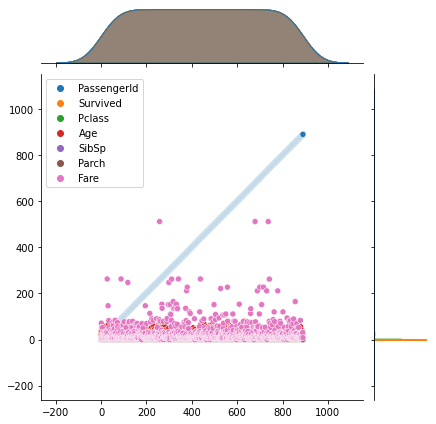

In [13]:
sns.jointplot(data=df)

<AxesSubplot:>

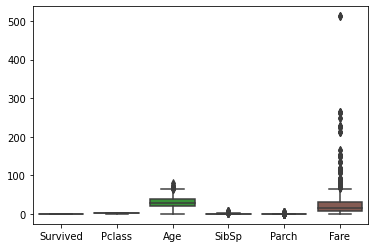

In [14]:
sns.boxplot(data=df[df.columns[1:]])

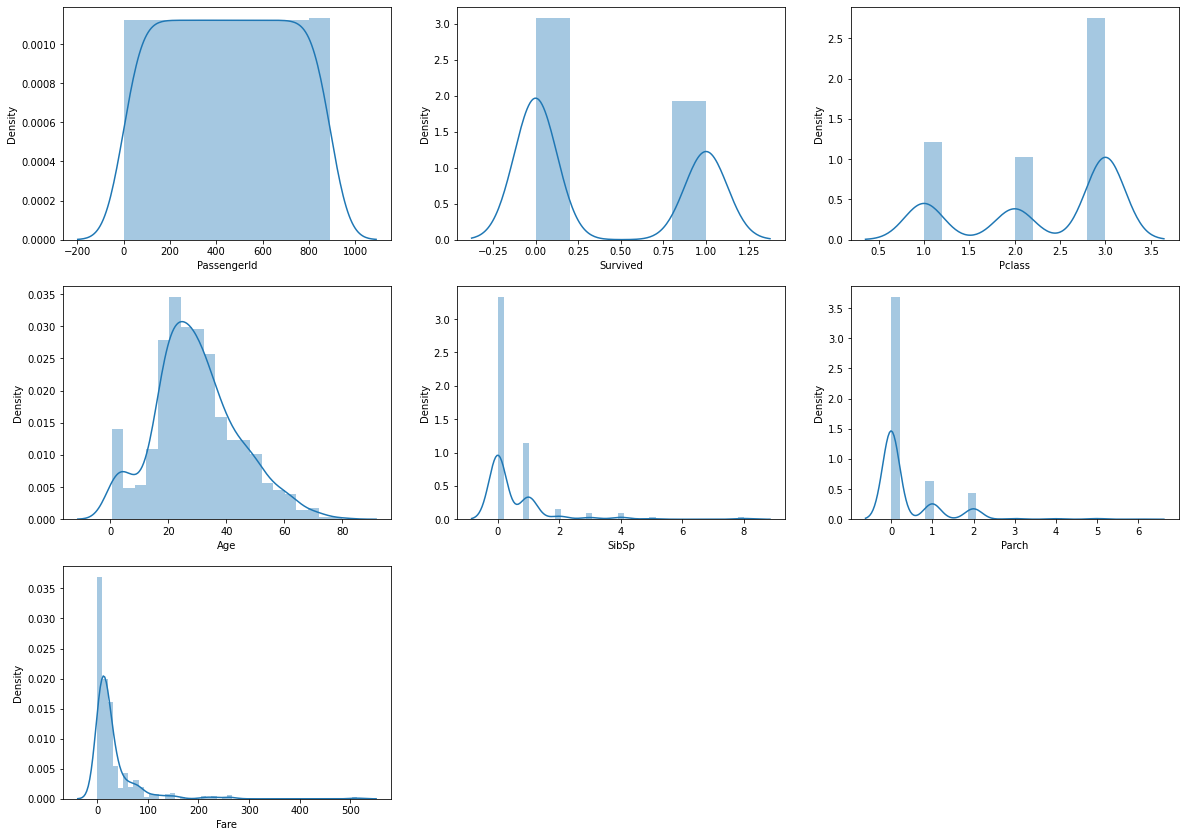

In [15]:
plt.figure(figsize=(20,30))
j=1
for i in df.select_dtypes(exclude='object').columns:
    plt.subplot(6,3,j)
    sns.distplot(df[i])
    j=j+1

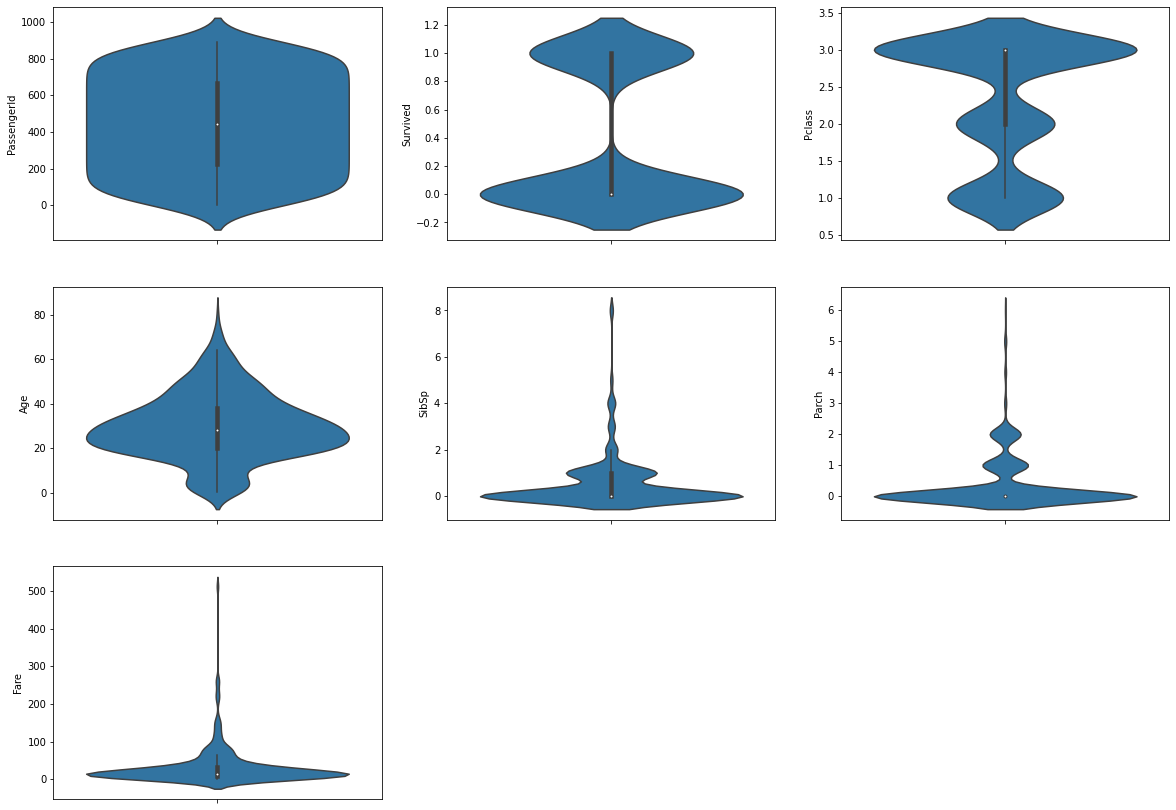

In [16]:
plt.figure(figsize=(20,30))
j=1
for i in df.select_dtypes(exclude='object').columns:
    plt.subplot(6,3,j)
    sns.violinplot(y=df[i])
    j=j+1

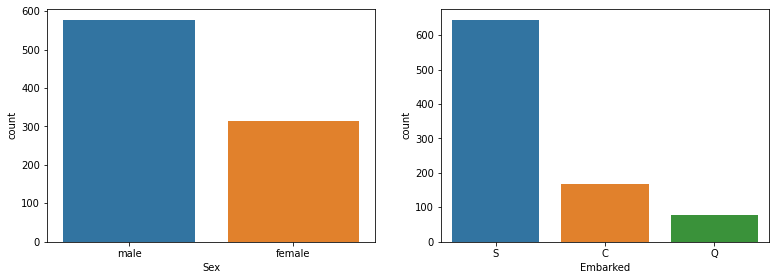

In [17]:
plt.figure(figsize=(20,30))
j=1
for i in df.select_dtypes(include='object').columns:
    if df[i].nunique()<=20:
        plt.subplot(6,3,j)
        sns.countplot(df[i])
        j=j+1

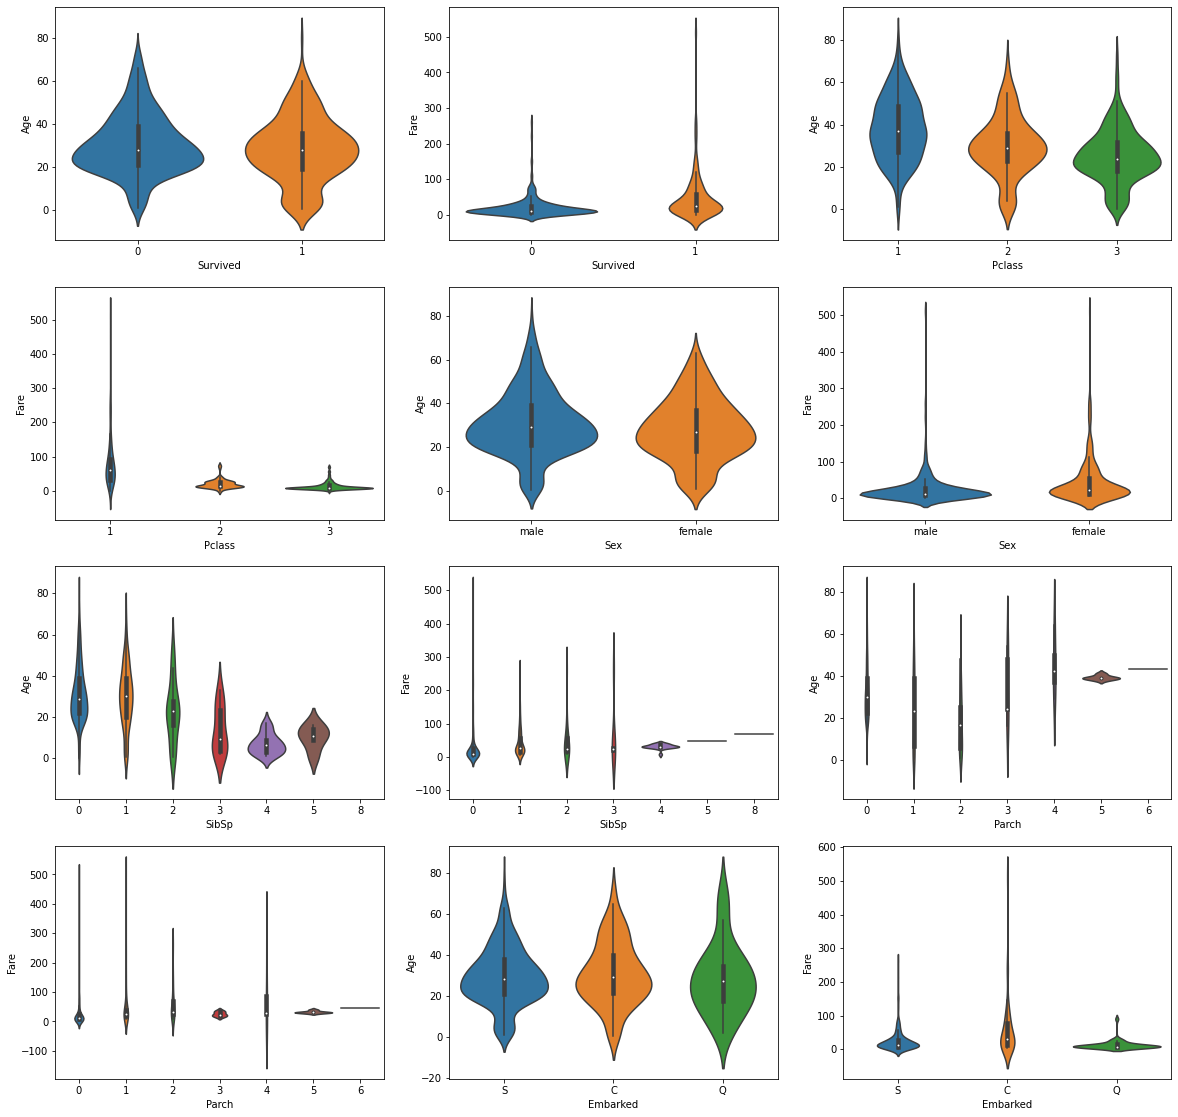

In [18]:
plt.figure(figsize=(20,30))
j=1
for i in ['Survived', 'Pclass','Sex','SibSp','Parch', 'Embarked']:
    for k in ['Age','Fare']:
        plt.subplot(6,3,j)
        sns.violinplot(x=df[i],y=df[k])
        j=j+1

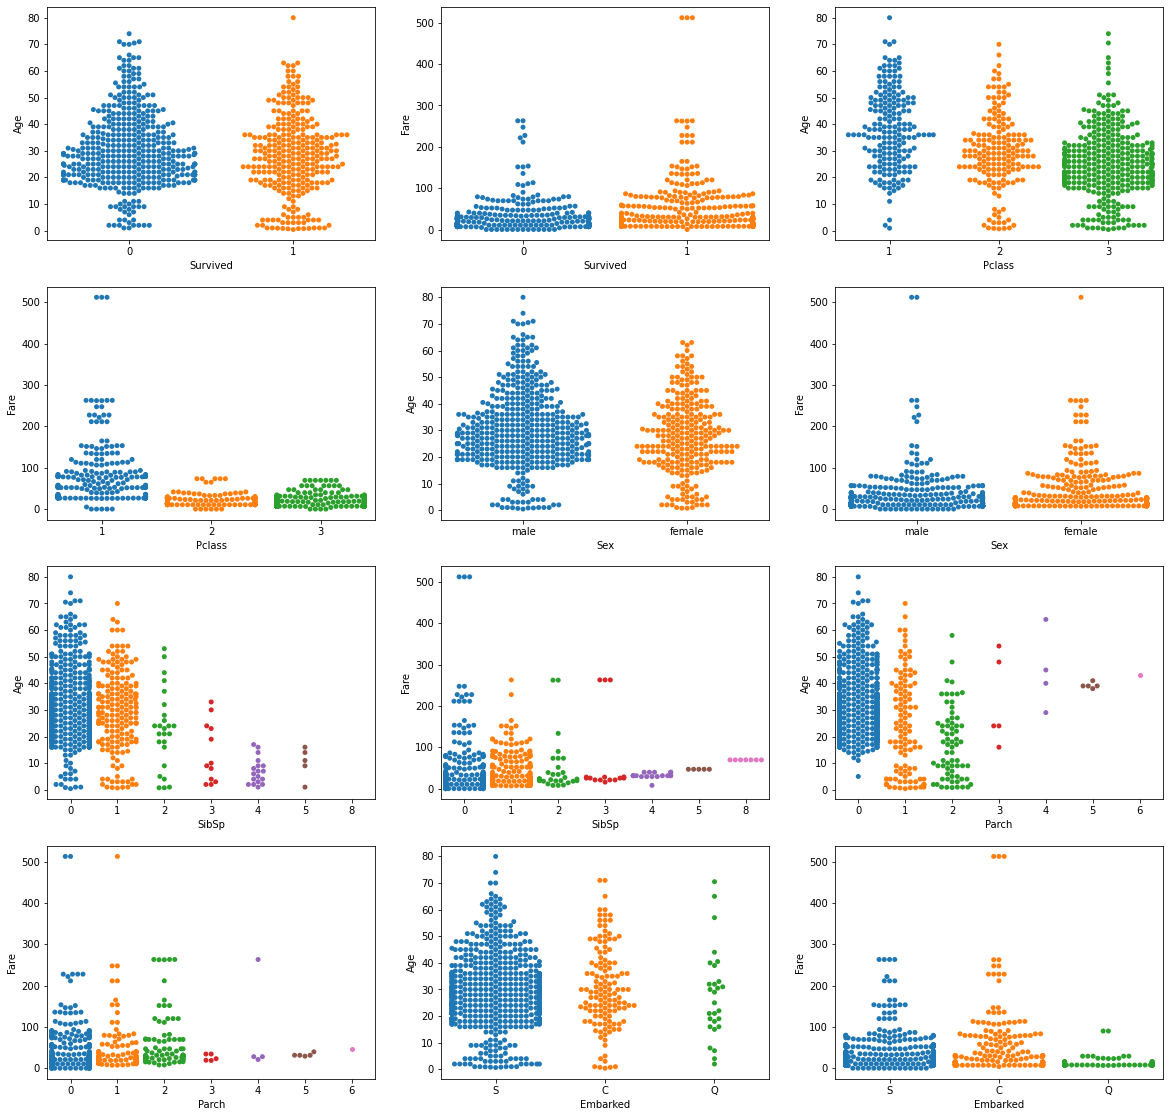

In [19]:
plt.figure(figsize=(20,30))
j=1
for i in ['Survived', 'Pclass','Sex','SibSp','Parch', 'Embarked']:
    for k in ['Age','Fare']:
        plt.subplot(6,3,j)
        sns.swarmplot(x=df[i],y=df[k])
        j=j+1

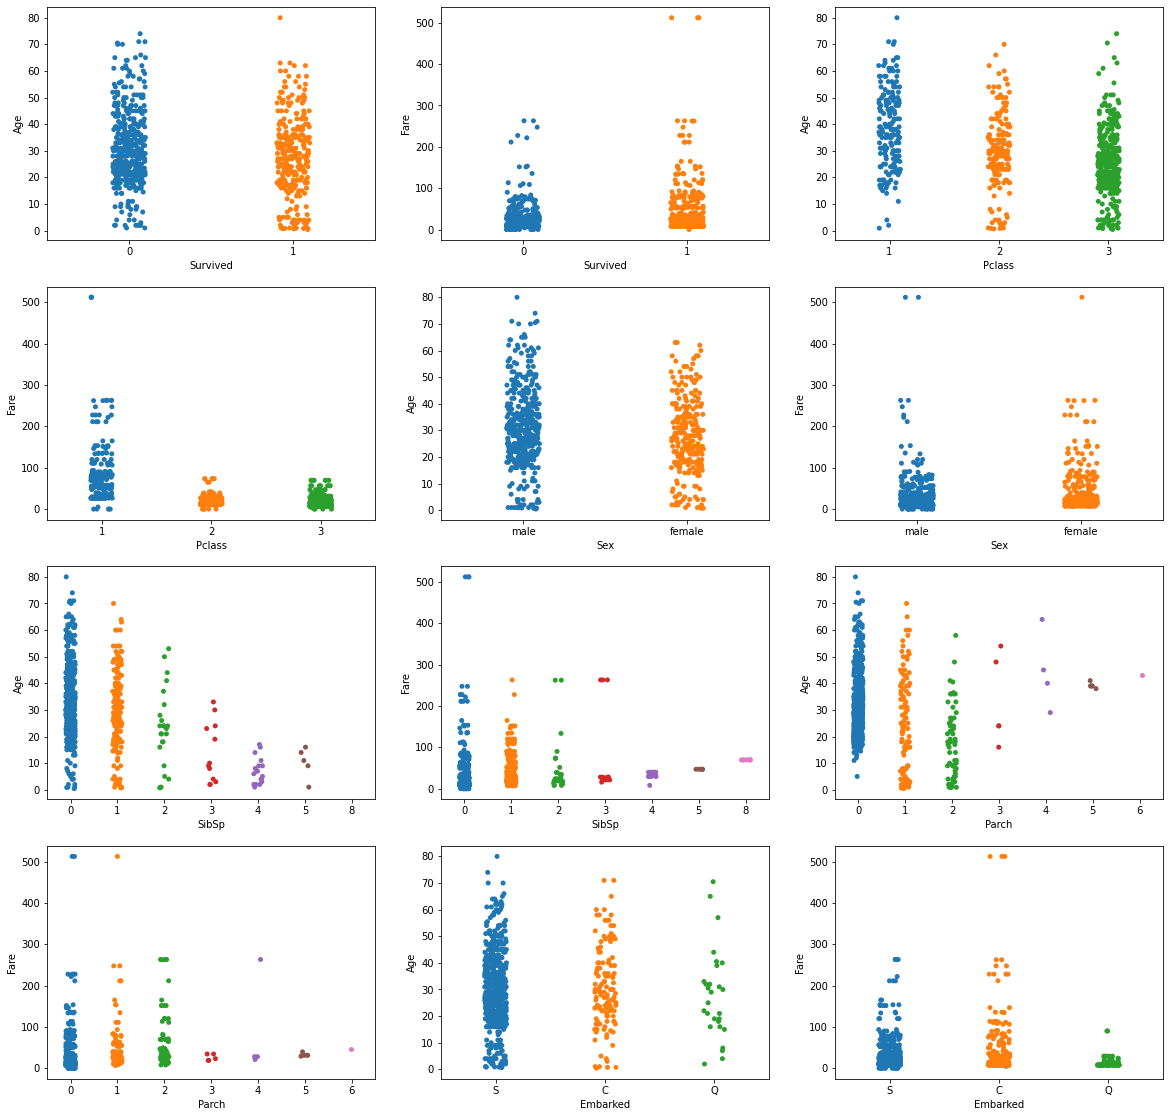

In [20]:
plt.figure(figsize=(20,30))
j=1
for i in ['Survived', 'Pclass','Sex','SibSp','Parch', 'Embarked']:
    for k in ['Age','Fare']:
        plt.subplot(6,3,j)
        sns.stripplot(x=df[i],y=df[k])
        j=j+1

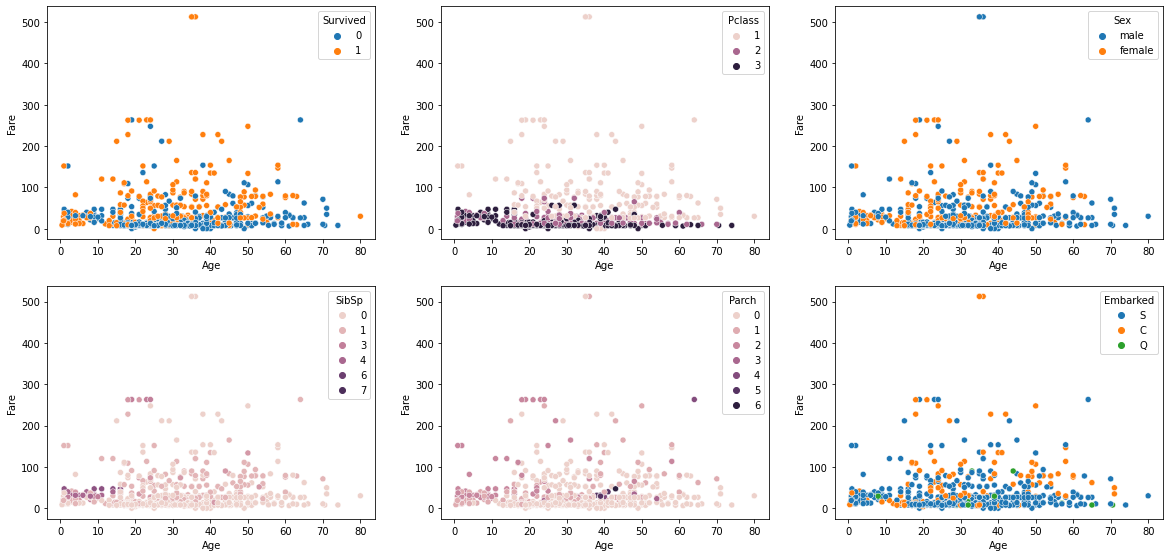

In [21]:
plt.figure(figsize=(20,30))
j=1
for i in ['Survived', 'Pclass','Sex','SibSp','Parch', 'Embarked']:
    plt.subplot(6,3,j)
    sns.scatterplot(x=df['Age'],y=df['Fare'],hue=df[i])
    j=j+1

In [22]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

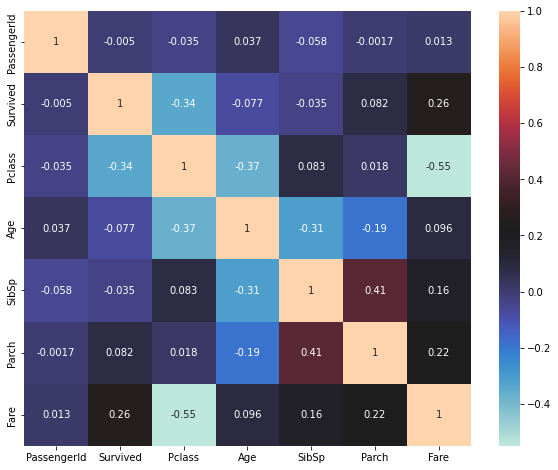

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='icefire',annot=True)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [26]:
ss = df.groupby(['Sex']).agg(sum1 = ('Survived',sum),c = ('Survived','count'))
ss['p'] = ss['sum1']/ss['c']
ss

,sum1,c,p
Sex,,,
female,233,314,0.742038
male,109,577,0.188908


In [27]:
pd.crosstab(df['Embarked'],df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [28]:
ss = df.groupby(['Embarked']).agg(sum1 = ('Survived',sum),c = ('Survived','count'))
ss['p'] = ss['sum1']/ss['c']
ss

,sum1,c,p
Embarked,,,
C,93,168,0.553571
Q,30,77,0.389610
S,217,644,0.336957


In [29]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df['Age'].median()

28.0

In [31]:
df.groupby(['Pclass'])['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [32]:
df.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [33]:
df.loc[((df['Pclass']==1)&(df['Age'].isna())),'Age']=37
df.loc[((df['Pclass']==2)&(df['Age'].isna())),'Age']=29
df.loc[((df['Pclass']==3)&(df['Age'].isna())),'Age']=24

In [34]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
df['Cabin'] = df['Cabin'].str[0]

In [36]:
df.loc[df['Cabin'].isna(),'has_cabin']  = 0

In [37]:
df.loc[df['Cabin'].notna(),'has_cabin']  = 1

In [38]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN,1.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN,1.0


In [40]:
df[(df['Survived']==1)&(df['Pclass']==1)&(df['Sex']=='female')&(df['SibSp']==0)&(df['Parch']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S,1.0
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B,NaN,1.0
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B,C,1.0
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B,C,1.0
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D,C,1.0
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,37.0,0,0,PC 17585,79.2000,NaN,C,0.0
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B,S,1.0
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0.0
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C,S,1.0
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,0.0


In [41]:
df[(df['Survived']==1)&(df['Pclass']==1)&(df['Sex']=='female')&(df['SibSp']==0)&(df['Parch']==0)&(df['Age']==38)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.000,B,NaN,1.0
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.525,C,C,1.0


In [42]:
df[(df['Survived']==1)&(df['Pclass']==1)&(df['Sex']=='female')&(df['SibSp']==0)&(df['Parch']==0)&(df['Age']>57)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has_cabin
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S,1.0
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B,C,1.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B,NaN,1.0


In [43]:
df[(df['Pclass']==1)&(df['Sex']=='female')&(df['SibSp']==0)&(df['Parch']==0)].groupby(['Embarked'])['Fare'].mean()

Embarked
C    120.692128
S     90.728571
Name: Fare, dtype: float64

In [44]:
df[(df['Survived']==1)&(df['Pclass']==1)&(df['Sex']=='female')&(df['SibSp']==0)&(df['Parch']==0)]['Embarked'].value_counts()

C    17
S    14
Name: Embarked, dtype: int64

In [45]:
df.loc[df['Embarked'].isna(),'Embarked']='S'

In [46]:
del df['Ticket']
del df['Name']
del df['Cabin']


In [47]:
del df1['Ticket']
del df1['Name']

In [48]:
df.index=df['PassengerId']
del df['PassengerId']

In [49]:
df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
has_cabin    0
dtype: int64

In [50]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has_cabin
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0.0
2,1,1,female,38.0,1,0,71.2833,C,1.0
3,1,3,female,26.0,0,0,7.9250,S,0.0
4,1,1,female,35.0,1,0,53.1000,S,1.0
5,0,3,male,35.0,0,0,8.0500,S,0.0
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,0.0
888,1,1,female,19.0,0,0,30.0000,S,1.0
889,0,3,female,24.0,1,2,23.4500,S,0.0


In [51]:
df['Sex'] = df['Sex'].replace({'female':1,'male':0})
df['Embarked'] = df['Embarked'].replace({'C':2,'Q':1,'S':0})

In [52]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has_cabin
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,0.0
2,1,1,1,38.0,1,0,71.2833,2,1.0
3,1,3,1,26.0,0,0,7.9250,0,0.0
4,1,1,1,35.0,1,0,53.1000,0,1.0
5,0,3,0,35.0,0,0,8.0500,0,0.0


In [53]:
df1.shape

(418, 9)

In [54]:
df1.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [55]:
df1.groupby(['Pclass'])['Age'].median()

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

In [56]:
df1.loc[((df1['Pclass']==1)&(df1['Age'].isna())),'Age']=42
df1.loc[((df1['Pclass']==2)&(df1['Age'].isna())),'Age']=26.5
df1.loc[((df1['Pclass']==3)&(df1['Age'].isna())),'Age']=24

In [57]:
df1[df1['Fare'].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
152,1044,3,male,60.5,0,0,NaN,NaN,S


In [58]:
df1[(df1['Pclass']==3)&(df1['Sex']=='male')&(df1['Embarked']=='S')&(df1['SibSp']==0)&(df1['Parch']==0)]['Fare'].median()

7.8958

In [59]:
df1['Fare'][df1['Fare'].isna()]=7.89

In [60]:
df1.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [61]:
df1['Cabin'] = df1['Cabin'].str[0]

In [62]:
df1.loc[df1['Cabin'].isna(),'has_cabin']  = 0

In [63]:
df1.loc[df1['Cabin'].notna(),'has_cabin']  = 1

In [64]:
df1.index=df1['PassengerId']
del df1['PassengerId']

In [65]:
df1.shape,df.shape

((418, 9), (891, 9))

In [66]:
df1['Relatives'] = df1['SibSp'] + df1['Parch']

In [67]:
df1['Sex'] = df1['Sex'].replace({'female':1,'male':0})
df1['Embarked'] = df1['Embarked'].replace({'C':2,'Q':1,'S':0})

In [68]:
del df1['SibSp']
del df1['Parch']
del df1['Cabin']

In [69]:
a = df.corr()
a

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has_cabin
Survived,1.000000,-0.338481,0.543351,-0.047255,-0.035322,0.081629,0.257307,0.167675,0.316912
Pclass,-0.338481,1.000000,-0.131900,-0.408487,0.083081,0.018443,-0.549500,-0.162098,-0.725541
Sex,0.543351,-0.131900,1.000000,-0.078421,0.114631,0.245489,0.182333,0.108262,0.140391
Age,-0.047255,-0.408487,-0.078421,1.000000,-0.243526,-0.171095,0.123784,0.011245,0.276032
SibSp,-0.035322,0.083081,0.114631,-0.243526,1.000000,0.414838,0.159651,-0.068230,-0.040460
Parch,0.081629,0.018443,0.245489,-0.171095,0.414838,1.000000,0.216225,-0.039798,0.036987
Fare,0.257307,-0.549500,0.182333,0.123784,0.159651,0.216225,1.000000,0.224719,0.482075
Embarked,0.167675,-0.162098,0.108262,0.011245,-0.068230,-0.039798,0.224719,1.000000,0.160196
has_cabin,0.316912,-0.725541,0.140391,0.276032,-0.040460,0.036987,0.482075,0.160196,1.000000


In [70]:
a>0.5  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has_cabin
Survived,True,False,True,False,False,False,False,False,False
Pclass,False,True,False,False,False,False,False,False,False
Sex,True,False,True,False,False,False,False,False,False
Age,False,False,False,True,False,False,False,False,False
SibSp,False,False,False,False,True,False,False,False,False
Parch,False,False,False,False,False,True,False,False,False
Fare,False,False,False,False,False,False,True,False,False
Embarked,False,False,False,False,False,False,False,True,False
has_cabin,False,False,False,False,False,False,False,False,True


In [71]:
df['Relatives'] = df['SibSp'] + df['Parch']

In [72]:
del df['SibSp']
del df['Parch']

In [73]:
df.corr()['Survived']

Survived     1.000000
Pclass      -0.338481
Sex          0.543351
Age         -0.047255
Fare         0.257307
Embarked     0.167675
has_cabin    0.316912
Relatives    0.016639
Name: Survived, dtype: float64

In [74]:
y = df['Survived']
del df['Survived']


In [75]:
x = df.copy()


In [76]:
df.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'has_cabin', 'Relatives'], dtype='object')

In [77]:
df1.columns


Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'has_cabin', 'Relatives'], dtype='object')

In [78]:
df.corr()

,Pclass,Sex,Age,Fare,Embarked,has_cabin,Relatives
Pclass,1.000000,-0.131900,-0.408487,-0.549500,-0.162098,-0.725541,0.065997
Sex,-0.131900,1.000000,-0.078421,0.182333,0.108262,0.140391,0.200988
Age,-0.408487,-0.078421,1.000000,0.123784,0.011245,0.276032,-0.251918
Fare,-0.549500,0.182333,0.123784,1.000000,0.224719,0.482075,0.217138
Embarked,-0.162098,0.108262,0.011245,0.224719,1.000000,0.160196,-0.066516
has_cabin,-0.725541,0.140391,0.276032,0.482075,0.160196,1.000000,-0.009175
Relatives,0.065997,0.200988,-0.251918,0.217138,-0.066516,-0.009175,1.000000


In [79]:
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=0)

In [80]:
classifiers = [LogisticRegression(solver='liblinear'),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SVC(),GaussianProcessClassifier()]

In [81]:
for i in classifiers:
    model = i
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('______________________________________________')
    print(i)
    print('..............................................')
    print('Train',model.score(x_train, y_train)*100)
    print('Test',model.score(x_test, y_test)*100)

______________________________________________
LogisticRegression(solver='liblinear')
..............................................
Train 80.19662921348315
Test 82.12290502793296
______________________________________________
KNeighborsClassifier()
..............................................
Train 80.19662921348315
Test 73.74301675977654
______________________________________________
DecisionTreeClassifier()
..............................................
Train 98.73595505617978
Test 79.88826815642457
______________________________________________
RandomForestClassifier()
..............................................
Train 98.73595505617978
Test 83.79888268156425
______________________________________________
MLPClassifier()
..............................................
Train 83.28651685393258
Test 80.44692737430168
______________________________________________
AdaBoostClassifier()
..............................................
Train 83.00561797752809
Test 80.44692737430168
_____

In [82]:
#from pycaret.classification import *

In [83]:
#df['Survived'] = y

In [84]:
#classify = setup(data = df, target = 'Survived',train_size=0.7 )

In [85]:
#best_model = compare_models()

In [86]:
#best_model

In [87]:
model = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=2)

In [88]:
#model = CatBoostClassifier(n_estimators=25, max_depth=5, random_state=2)

In [89]:
#model = GradientBoostingClassifier(n_estimators=10, max_depth=3, random_state=2)

In [90]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('______________________________________________')
print('Train',model.score(x_train, y_train)*100)
print('Test',model.score(x_test, y_test)*100)

______________________________________________
Train 83.70786516853933
Test 82.12290502793296


In [91]:
x_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'has_cabin', 'Relatives'], dtype='object')

In [92]:
x_train.dtypes

Pclass         int64
Sex            int64
Age          float64
Fare         float64
Embarked       int64
has_cabin    float64
Relatives      int64
dtype: object

In [93]:
df1.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'has_cabin', 'Relatives'], dtype='object')

In [94]:
df1.dtypes

Pclass         int64
Sex            int64
Age          float64
Fare         float64
Embarked       int64
has_cabin    float64
Relatives      int64
dtype: object

In [95]:
model.fit(x,y)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=2)

In [96]:
pred = model.predict(df1)

In [97]:
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [98]:
df1

,Pclass,Sex,Age,Fare,Embarked,has_cabin,Relatives
PassengerId,,,,,,,
892,3,0,34.5,7.8292,1,0.0,0
893,3,1,47.0,7.0000,0,0.0,1
894,2,0,62.0,9.6875,1,0.0,0
895,3,0,27.0,8.6625,0,0.0,0
896,3,1,22.0,12.2875,0,0.0,2
...,...,...,...,...,...,...,...
1305,3,0,24.0,8.0500,0,0.0,0
1306,1,1,39.0,108.9000,2,1.0,0
1307,3,0,38.5,7.2500,0,0.0,0


In [99]:
sub = df1.copy()

In [100]:
sub = sub.reset_index()

In [101]:
sub['Survived'] = pred
sub = sub[['PassengerId','Survived']]

In [102]:
sub.to_csv('submission.csv',index=False)